# Bankruptcy Prediction (Machine Learning Assignment)

In [1]:
!pip install xgboost

In [1]:
#Import necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,confusion_matrix, ConfusionMatrixDisplay

## Exploratory Data Analysis

In [2]:
#Load the data
data= pd.read_csv("/Users/shanxie/Desktop/PG_Applied_AI/Machine_Learning/Assignment/Data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
#Summary of dataframe structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
#Statistic summary of the data
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
#check if there is missing data
data.isnull().sum().sum() == 0

True

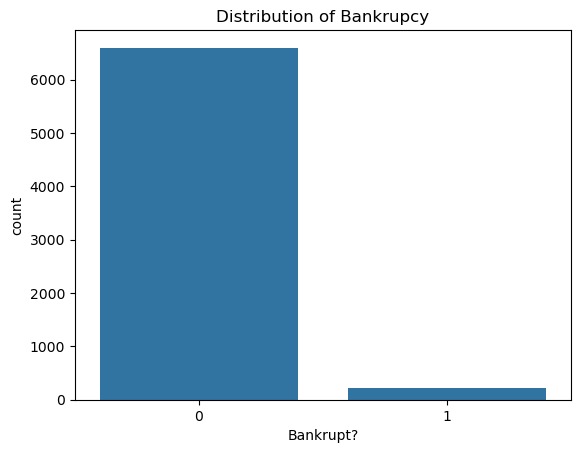

In [6]:
#Check the distribution of the target variable
sns.countplot(x=data['Bankrupt?'],data=data)
plt.title("Distribution of Bankrupcy")
plt.show()

In [7]:
#Sainty check for the imbalaced distribution of target variable
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

From the quick inspection of the data, the dataset appears to be quite clean, with no missing values.. However,our tagert variable `Bankrupt?` comes with highly imbalanced distribution. This can be problematic when we are doing model training as the model may become biased toward predicting the majority class and come with misleading accuracy score. Therefore, it is important to carry this in mind during the model training and when selecting appropriate evaluation metrics.

## Train/Test Data Split

Data will be split before the feature selection to avoid data leakage. The validation set will be split from the training set after the feature selection step.

In [8]:
#Define X and y
X=data.drop("Bankrupt?",axis=1)
y=data["Bankrupt?"]

#Data split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 stratify=y, # make the each split represent reality representation
                                                 random_state=42 )

## Pipeline for Feature selection

Since there are 95 features in our dataset, it becomes computationally expensive to train models on such a high-dimensional dataset. In addition, certain models do not perform well in high-dimensional settings and may suffer from a high risk of overfitting. Therefore, it is necessary to build a feature-selection pipeline before the model training step.

`Step 1`: we start with `scaler`, as standardlization of the dataset is a requirement for many machine learning estimators. We chose `StandardScaler` instead other scalers because of the later choices made when setting up the pipeline: We will use linear model `LogisticRegreesion`, and `StandardScaler` works well with linear models and help the coefficients become comparable. That's also necessary preparation step for L1 regularization. which penalizes coefficients under the assumption that they are on a comparable scale. `StandardScaler` can fix the dataset and make it ready for L1 regularization.

`Step 2`: we have `VarianceThreshold` and we set `threshold=0.01`. It will remove the features that barely change across all the samples. If a feature is the almost the same for every company, then it can only add noise to model training and it is unlikely to provide useful information for distinguishing between bankrupt and non-bankrupt companies

`Step 3`: For `feature_selection`, we chose `LogisticRegreesion` as our estimator. We set `penalty=l1` as the L1 will set the coefficients of less important features to zero. That's exactly what we want to have the important features selected. Naturally, we need a solver that supports L1. Thus, we have `liblinear` as solver. It work well with small to medium dataset. Bearing in mind that we have imbalanced dataset, we set `class_weight= balanced`. This will ensure that our minority predictor class won't be ignored, otherwise L1 could zero out some features that are important for bankruptcy.


In [9]:
pipeline= Pipeline([
    ('scaler',StandardScaler()),
    ("low_variance", VarianceThreshold(threshold=0.01)),#remove the low variance features
    ("feature_selection",SelectFromModel(
        LogisticRegression(
            penalty='l1',
            solver='liblinear',
            class_weight= 'balanced',
            random_state= 42,      
        )
    ))
])

## Model Comparison

### Logistic Regression (Baseline model)

we chose `LogisticRegreesion` as our basline model.It is good for binary classification task. By default, it uses L2 regularization, which shrinks large coefficients, thereby simplifying the model, reducing overfitting, and improving the robustness of the model.

In [10]:
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("low_variance", VarianceThreshold(threshold=0.01)),
    ("feature_selection", SelectFromModel(
        LogisticRegression(
            penalty="l1",
            solver="liblinear",
            class_weight="balanced",
            random_state=42
        )
    )),
    ("classifier", LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        random_state=42
    ))
])

### Random Forest

Compared to `LogisticRegression`, `RandomForest` doesn't require feature scaling and performs implicit feature selection. Tree-based models don't use distance or gradient, instead they rely on threshold-based splits. `RandomForest` will chooses only the most informative ones at each split and automatically ignore the useless features. Therefore, the `scaler` and `feature_selection` are removed from the pipeline.

In [11]:
rf_pipeline = Pipeline([
    ("low_variance", VarianceThreshold(threshold=0.01)),
    ("classifier", RandomForestClassifier(
        n_estimators=300,#more stable, less computational expensive
        max_depth=None,
        min_samples_leaf=5,#regularization parameter, avoid overfitting
        class_weight="balanced",
        random_state=42,
        n_jobs=-1 #faster training 
    ))
])

### XGBoost

In addition to linear, bagging-based, and neural network models, a gradient boosting model (XGBoost) was added for model comparison. `XGBoost`is excellent on tabular financial data and often considered state-of-the-art for bankruptcy / credit risk tasks. It is a tree-based as `RandomForest`, but it is a boosting method rather than a bagging approach. Therefore, it is interesting to do a small comparison between tree-based models.

It is worth mentioning the different hyperparameter setting for `max_depth` in `RandomForest`and `XGBoost`: ` max_depth=None` for `RandomForest`, but `max_depth=4` for `XGBoost`. This difference comes from how the trees are built in this two models. For `RandomForest`, many trees are built individually. Overfitting is reduced by averaging and regulated by parameters such as `min_samples_leaf=5`. Therefore, it is ok to have deeper trees. However, trees are built sequentially in `XGBoost`. If we don't set the `max_depth`, the model would have high-risk to overfitting.

In [12]:
XGBoost_pipeline= Pipeline([
    ("low_variance", VarianceThreshold(threshold=0.01)),
    ("classifier",XGBClassifier(
        n_estimators=500,
        max_depth=4,#keep the tree shallow, avoid overfitting
        learning_rate=0.05,
        subsample=0.8,# each tree see 80% the training samples randomly,introduce diversity
        colsample_bytree=0.8,#each tree only uses 80% of the features, avoiding feature dominance 
        objective="binary:logistic",#we have binary classification task
        eval_metric="auc",
        #fix the imbalanced class:sum(negative instances) / sum(positive instances)
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        random_state=42,
        n_jobs=-1
    ))

    
])


#### fine-tuning the model

Surprisingly, `XGBoost` outperformed all the other models in the cross-validation evaluation:

<br> Logistic Regression: ROC-AUC = 0.8867 ± 0.0418
<br> Random Forest: ROC-AUC = 0.9311 ± 0.0257
<br> XGBoost: ROC-AUC = 0.9312 ± 0.0230
<br> Neural Network: ROC-AUC = 0.8458 ± 0.0194

Out of curiosity, we would like to see if we can push the performance of `XGBoost` further. Since XGBoost provides many hyperparameters to tune, it offers a wide range of possibilities for finding an optimal configuration. We will start with adding a bit complexity of the trees.The `min_child_weight` parameter is introduced to tune the classifier’s behavior. It could prevent the model from learning rules based on rare samples(very few companies), which could improve generalization in imbalanced bankruptcy data.

In [16]:
param_grid = {
    "classifier__max_depth": [3, 4, 5],
    "classifier__min_child_weight": [1, 5, 10]
}

xgb_tune_1 = GridSearchCV(
    XGBoost_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)

xgb_tune_1.fit(X_train, y_train)

print("Best ROC-AUC:", xgb_tune_1.best_score_)
print("Best params:", xgb_tune_1.best_params_)

Best ROC-AUC: 0.9356927432756817
Best params: {'classifier__max_depth': 5, 'classifier__min_child_weight': 10}


After hyperparameter tuning, `XGBoost` achieved a mean ROC-AUC of 0.936, outperformed its previous untuned model. The optimal configuration favored deeper but more conservative trees, suggesting that bankruptcy risk depends on complex but stable financial patterns.

In [17]:
#tuned XGBoost Model
xgb_tune_1= Pipeline([
    ("low_variance", VarianceThreshold(threshold=0.01)),
    ("classifier",XGBClassifier(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="auc",
        min_child_weight=10,
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        random_state=42,
        n_jobs=-1
    ))
    
])

### Neural Network

For our `neural_network`model, we have removed the `low_variance` and `feature_selection` as neural networks learn feature relevance internally through weight optimization. To a NN model, 95 features are not too large to learn from. And if we reduce the features, it might miss some weak but important signals between featuers or some non-linear interactions. However, it is important to keep the data clean and scaled.

In [14]:
Mlp_pipeline= Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        max_iter=500,
        random_state=42
    ))
])

## Cross validation 

In K-fold cross_validator `StratifiedKFold`, we use 5-fold stratified cross-validation on training set, which resulting in 80% training data and 20% validation data in each spli. We set `shuffle=True` as we want to ensure randomized, class-balanced folds. If we don't shuffle the dataset before stratification, one fold may get most bankrupt firms, while another fold gets almost none. Stratificaton keeps the class ratio per fold but not resolve the problem of ordering bias.

The evaluation metric for cross validation, we use `ROC_AUC`. `ROC-AUC` allows us to know what is the probability that the model gives the bankrupt one a higher score if the model randomly pick one bankrupt company and one non-bankrupt company. This is ideal for our imbalanced dataset as `ROC-AUC` only cares about ranking quality. And the score tells us how good the model is at ranking the risk. We didn't choose `Accuracy`as an evaluation metric because, given the imbalanced nature of the dataset, it can be misleading. In the end, we computed the `Mean ROC_AUC` socre for demostrating the average performance we could expect from all folds, and the standard deviation of the `ROC_AUC`score tells us the stability of the model performance across all folds.

In [15]:
cv= StratifiedKFold(
    n_splits= 5,
    shuffle= True,
    random_state= 42
)


### Model comparison (cross_validation)

In [18]:
models={
    "Logistic Regression":logreg_pipeline,
    "Random Forest":rf_pipeline,
    "XGBoost":XGBoost_pipeline,
    "XGBoost_tuned":xgb_tune_1,
    "Neural Network":Mlp_pipeline    
}

result={} #dictionary for storing the scores of each model later

for name,model in models.items():
    scores= cross_val_score(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring= 'roc_auc')
    result[name]=(scores.mean(),scores.std())#store mean ROC_AUC score and Std ROC_AUC score under each model

In [19]:
#print out all the scores of each model on cross-validation
for model,(mean,std) in result.items():
    print(f'{model}: ROC_AUC {mean:.3f} \u00B1 {std:.3f}')# round the results to 2 decimals

Logistic Regression: ROC_AUC 0.887 ± 0.042
Random Forest: ROC_AUC 0.931 ± 0.026
XGBoost: ROC_AUC 0.931 ± 0.023
XGBoost_tuned: ROC_AUC 0.936 ± 0.021
Neural Network: ROC_AUC 0.846 ± 0.019


## Final Test evaluation

### F1_Score & ROC_AUC_Score

For final evaluation,`F1_score` is added into evaluation metrics. It wasn't added during the cross_validation set due to its nature of using a fixed decision threshold. During cross-validation different fold may have very different F1 score for the same model, which makes very difficult to do model comparison. Now we only have one test set for finally evaluation, it makes more sense for including it.

In [20]:
models={
    "Logistic Regression":logreg_pipeline,
    "Random Forest":rf_pipeline,
    "XGBoost_tuned":xgb_tune_1,
    "Neural Network":Mlp_pipeline    
}

results=[]

for name,model in models.items():
    model.fit(X_train,y_train)
    y_test_proba= model.predict_proba(X_test)[:,1]#cross all samples and extra the probability of class 1-bankrupt
    roc_auc_test= roc_auc_score(y_test,y_test_proba)

    y_test_pred= model.predict(X_test)
    f1= f1_score(y_test,y_test_pred)

    results.append(
        {"model":name,
         "ROC_AUC":round(roc_auc_test,3),
         "F1_Score":round(f1,3)
        }
    )   

In [21]:
results

[{'model': 'Logistic Regression', 'ROC_AUC': 0.916, 'F1_Score': 0.303},
 {'model': 'Random Forest', 'ROC_AUC': 0.966, 'F1_Score': 0.482},
 {'model': 'XGBoost_tuned', 'ROC_AUC': 0.954, 'F1_Score': 0.511},
 {'model': 'Neural Network', 'ROC_AUC': 0.837, 'F1_Score': 0.27}]

Overall, the `XGBoost_tuned` model outperformed other models in both ROC_AUC (0.954) and F1 score (0.511). All the models are very good at ranking the bankrupcy risk with quite high ROC_AUC scores, but but much worse at actually predicting bankrupt companies (lower F1 scores). This likely due to the rarity of bankruptcy events and the gradual nature of financial distress, which makes hard classification more difficult than risk ranking.

In terms of overall performance, the tree-based models are doing much better than neural network. The reasons behind it could be:

- Limited data size, strong class imbalance, and the noisy nature of financial ratios: neural networks require larger datasets and careful regularization to learn stable decision boundaries.
- Tree-base models can capture non-linear interactions and indentify sharper risk regions.


### Confusion Matrix

Furthermore, we are going to check the confusion matrices of all models on the test set. A confusion matrix can tell us insights on what kinds of mistakes the models made, which cannot gain from F1 scores and ROC_AUC score.

Specifically, we pay more attention to **False Negatives** (missed bankruptcies) and **False Positives** (non-bankrupt companies incorrectly classified as bankrupt)

<Figure size 400x400 with 0 Axes>

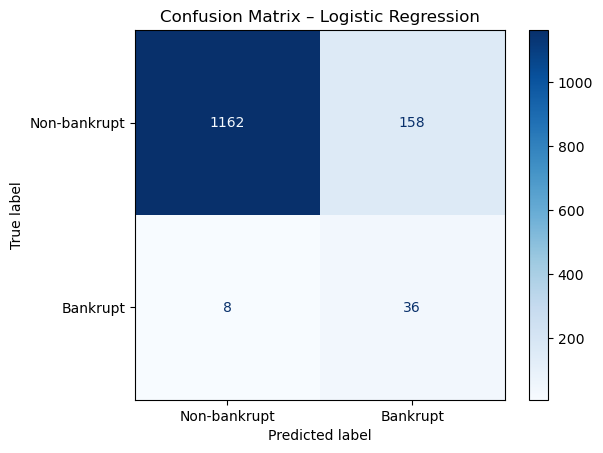

<Figure size 400x400 with 0 Axes>

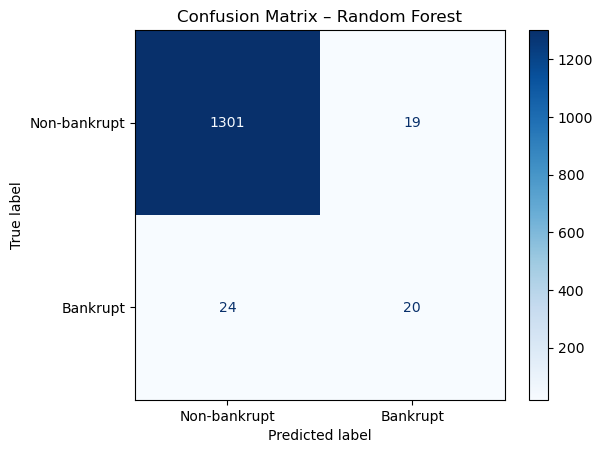

<Figure size 400x400 with 0 Axes>

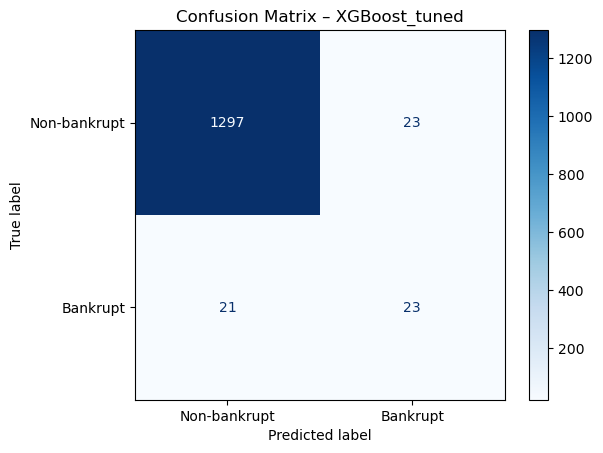

<Figure size 400x400 with 0 Axes>

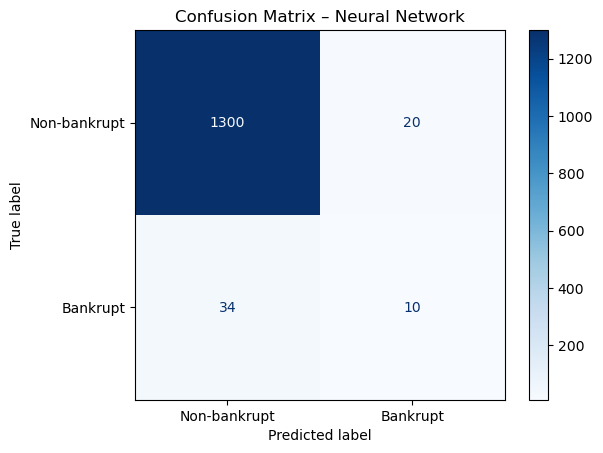

In [22]:
for name,model in models.items():
    y_test_pred= model.predict(X_test)
    cm=confusion_matrix(y_test,y_test_pred)

    disply=ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Non-bankrupt", "Bankrupt"]
    )
    plt.figure(figsize=(4,4))
    disply.plot(cmap='Blues',values_format='d')#values_format='d', integer format;'2g' for float
    plt.title(f"Confusion Matrix – {name}")
    plt.show()

we define 'non-bankcrupt'(0) as negative and 'bankrupt'(1) as positive.

**True Negative**(top left corner): `RandomForest` and `NeuralNetwork` are doing very well, while `LogisticRegression` is doing slightly poor among 4 models.

**True Positive**(bottom right corner): `LogisticRegression`has most correctly predicted bankrupcy counts, while `NeuralNetwork` has lowest counts.

**False Positive**(top right corner): `LogisticRegression` has raised most false alarms on bankrupcy among 4 models.

**False Negative**(bottom left corner): `NeuralNetwork` as the highest number of missed bankruptcies, while `LogisticRegression` has the lowest.

The confusion matrices above demostrate different classification behavoirs of four models:

- `LogisticRegression` achived the highest number of true positives and the lowest number of false negatives. It is good at catching most bankrupt companies correctly, but this comes at the cost of generating many false alarms (false positives).

- `NeuralNetwork` acted in a highly conservative manner, thus it has high true negatives and high false negatives. The model appears to focus heavily on the majority class (non-bankrupt) and is reluctant to predict the minority class (bankrupt). Missing bankruptcies is highly undesirable in this task.

- `RandomForest` and `BXGBoost`offer a more balanced trade-off, maintaining strong true negative rates while reducing missed bankruptcies.

Since False negatives are more costly compared to false positive in bankrupcy prediction, combining the F1 score and ROC_AUC socre, models with lower false negative rate should be more preferable: **RandomForest** and **BXGBoost**.

## Conclusion

In this assignment, we used a high-dimensional and imbalanced financial dataset to predict corporate bankruptcy. Taking the characteristics of the data into account, we reduced dimensionality through feature selection and addressed class imbalance by adjusting model parameters accordingly. Four different models were evaluated for this task. Multiple evaluation metrics were applied at different stages of the workflow to better understand each model’s classification behavior. The results demonstrate that neither a high F1 score nor a high ROC-AUC alone guarantees an optimal model for bankruptcy prediction. Instead, it is crucial to consider the trade-offs between different types of errors and to evaluate models based on which misclassifications are more costly in real-world financial decision-making.